In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import bootstrap

#train test split the data using sklearn
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

#Import libraries to implement linear regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#cross validation
from sklearn.model_selection import cross_val_score

#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#import Bagging and DT
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
df = pd.read_csv('Data/Breast_Cancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [3]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [4]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [5]:
X = df[['Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']]
y = df['Status']

#split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# EDA Analysis

<Axes: xlabel='Marital Status', ylabel='count'>

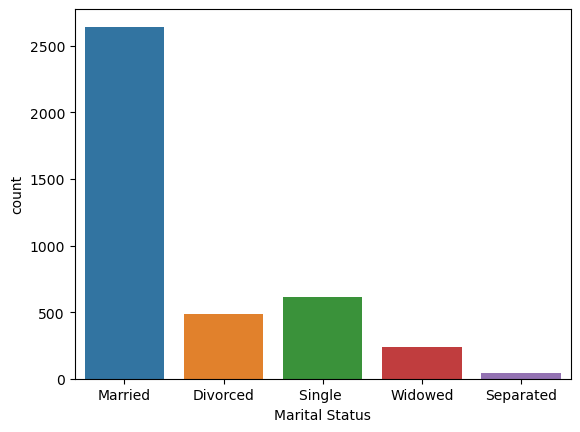

In [6]:
sns.countplot(data = df, x = 'Marital Status')

<Axes: xlabel='Race', ylabel='count'>

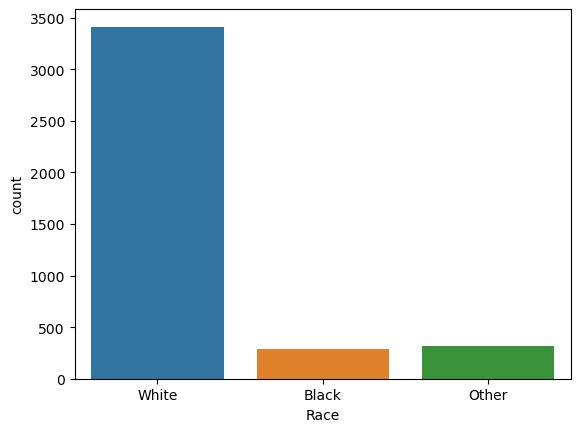

In [7]:
sns.countplot(data = df, x = 'Race')

C:\Users\ManikantaAleti\AppData\Local\Temp\ipykernel_17424\1688884197.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


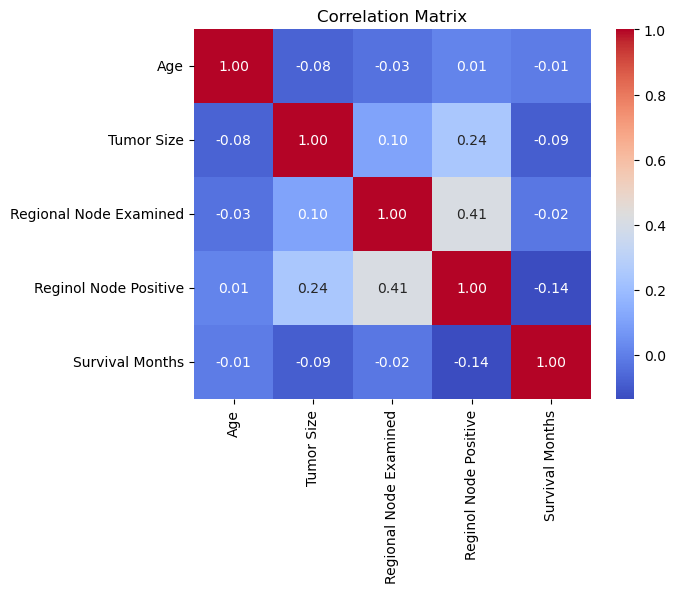

In [8]:
#Correlation Matrix

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [9]:
print(df.isnull().sum())

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


# Encoding Techniques

# Example of label encoding using pandas
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Marital Status'] = le.fit_transform(df['Marital Status'])
df['Race'] = le.fit_transform(df['Race'])
df = pd.get_dummies(df, columns=['Marital Status', 'Race'], drop_first=True)
#X = pd.get_dummies(X, columns=['Marital Status'], drop_first=True)
#X = pd.get_dummies(X, columns=['Race'], drop_first=True)

# Support Vector Machines

In [10]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
#import necessary libraries
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

In [12]:
# Train the SVM classifier on the training data
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

In [13]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [14]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.8968944099378882
Confusion Matrix:
[[673  12]
 [ 71  49]]
Classification Report:
              precision    recall  f1-score   support

       Alive       0.90      0.98      0.94       685
        Dead       0.80      0.41      0.54       120

    accuracy                           0.90       805
   macro avg       0.85      0.70      0.74       805
weighted avg       0.89      0.90      0.88       805



# K Nearest Neighbors

In [15]:
# import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [16]:
# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [17]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.8757763975155279
Confusion Matrix:
[[652  33]
 [ 67  53]]
Classification Report:
              precision    recall  f1-score   support

       Alive       0.91      0.95      0.93       685
        Dead       0.62      0.44      0.51       120

    accuracy                           0.88       805
   macro avg       0.76      0.70      0.72       805
weighted avg       0.86      0.88      0.87       805



# Decision Tree

In [18]:
# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

In [19]:
# Train the classifier on the training data
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_classifier.predict(X_test)

In [20]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.8496894409937888
Confusion Matrix:
[[629  56]
 [ 65  55]]
Classification Report:
              precision    recall  f1-score   support

       Alive       0.91      0.92      0.91       685
        Dead       0.50      0.46      0.48       120

    accuracy                           0.85       805
   macro avg       0.70      0.69      0.69       805
weighted avg       0.85      0.85      0.85       805



# Random Forest

In [21]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [22]:
# Train the classifier on the training data
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_classifier.predict(X_test)

In [23]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9006211180124224
Confusion Matrix:
[[664  21]
 [ 59  61]]
Classification Report:
              precision    recall  f1-score   support

       Alive       0.92      0.97      0.94       685
        Dead       0.74      0.51      0.60       120

    accuracy                           0.90       805
   macro avg       0.83      0.74      0.77       805
weighted avg       0.89      0.90      0.89       805



# Conclusion: Any model we use we are getting accuracy more than 80% and the data is fitting properly